In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
data = pd.read_csv('full_data.csv')
#Use only 30 columns

#extract those 30 columns to df

df = data[[
    'P_MASS','P_RADIUS','P_DENSITY','P_GRAVITY','P_ESCAPE','P_TYPE',
    'P_PERIOD','P_SEMI_MAJOR_AXIS','P_ECCENTRICITY','P_INCLINATION',
    'P_OMEGA','P_PERIASTRON','P_APASTRON','P_IMPACT_PARAMETER','P_HILL_SPHERE',
    'S_MASS','S_RADIUS','S_LUMINOSITY','S_TEMPERATURE','S_AGE',
    'S_METALLICITY','S_LOG_G','S_TYPE','S_MAG','S_DISC','S_MAGNETIC_FIELD',
    'S_SNOW_LINE','S_TIDAL_LOCK','P_DETECTION','P_DISTANCE'
]]

In [116]:
df.sample(5)

,P_MASS,P_RADIUS,P_DENSITY,P_GRAVITY,P_ESCAPE,P_TYPE,P_PERIOD,P_SEMI_MAJOR_AXIS,P_ECCENTRICITY,P_INCLINATION,...,S_METALLICITY,S_LOG_G,S_TYPE,S_MAG,S_DISC,S_MAGNETIC_FIELD,S_SNOW_LINE,S_TIDAL_LOCK,P_DETECTION,P_DISTANCE
524,915.34465,NaN,NaN,NaN,NaN,Jovian,225.620000,0.810,0.310,NaN,...,0.210,4.10,F8 V,5.902,NaN,NaN,5.592619,0.475110,Radial Velocity,0.848920
3991,1274.49030,16.70290,0.273502,4.568281,8.735189,Jovian,3.352057,0.047,0.100,85.50,...,-0.500,4.40,F6 V,16.130,NaN,NaN,3.630496,0.444333,Transit,0.047235
50,540.30760,NaN,NaN,NaN,NaN,Jovian,733.000000,1.700,0.760,NaN,...,-0.130,2.48,K3 III,8.699,NaN,NaN,17.162140,0.474781,Radial Velocity,2.190960
1487,7.94570,4.19254,0.107820,0.452041,1.376662,Neptunian,31.999600,0.195,0.012,88.89,...,-0.041,4.37,NaN,14.200,NaN,NaN,2.747306,0.504141,Transit,0.195014
2332,NaN,3.30695,NaN,NaN,NaN,Neptunian,5.868075,0.068,NaN,NaN,...,NaN,4.13,NaN,13.182,NaN,NaN,4.503484,NaN,Transit,0.068000


Objective

the aim of this project is to fill missing values preserving the real meaning of
dataset


First we will get the percentage of missing values here


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   P_MASS              1598 non-null   float64
 1   P_RADIUS            3139 non-null   float64
 2   P_DENSITY           706 non-null    float64
 3   P_GRAVITY           706 non-null    float64
 4   P_ESCAPE            706 non-null    float64
 5   P_TYPE              4031 non-null   object 
 6   P_PERIOD            3938 non-null   float64
 7   P_SEMI_MAJOR_AXIS   2367 non-null   float64
 8   P_ECCENTRICITY      1380 non-null   float64
 9   P_INCLINATION       844 non-null    float64
 10  P_OMEGA             746 non-null    float64
 11  P_PERIASTRON        3978 non-null   float64
 12  P_APASTRON          3978 non-null   float64
 13  P_IMPACT_PARAMETER  1409 non-null   float64
 14  P_HILL_SPHERE       1546 non-null   float64
 15  S_MASS              3283 non-null   float64
 16  S_RADI

In [118]:
percentage = df.isnull().mean()*100 #percentage of missing values
percentage

,0
P_MASS,60.523715
P_RADIUS,22.455534
P_DENSITY,82.559289
P_GRAVITY,82.559289
P_ESCAPE,82.559289
P_TYPE,0.419960
P_PERIOD,2.717391
P_SEMI_MAJOR_AXIS,41.526680
P_ECCENTRICITY,65.909091
P_INCLINATION,79.150198


In [119]:
#columns having more than certain amount of missing values should be eliminated

In [120]:
columns_to_drop = percentage[percentage > 80].index.tolist()
columns_to_drop

['P_DENSITY', 'P_GRAVITY', 'P_ESCAPE', 'P_OMEGA', 'S_DISC', 'S_MAGNETIC_FIELD']

In [121]:
columns_to_drop = percentage[percentage > 60].index.tolist()
columns_to_drop

['P_MASS',
 'P_DENSITY',
 'P_GRAVITY',
 'P_ESCAPE',
 'P_ECCENTRICITY',
 'P_INCLINATION',
 'P_OMEGA',
 'P_IMPACT_PARAMETER',
 'P_HILL_SPHERE',
 'S_TYPE',
 'S_DISC',
 'S_MAGNETIC_FIELD']

In [122]:
#drop more than 60% values

df = df.drop(columns_to_drop, axis=1)

In [123]:
df.head()

,P_RADIUS,P_TYPE,P_PERIOD,P_SEMI_MAJOR_AXIS,P_PERIASTRON,P_APASTRON,S_MASS,S_RADIUS,S_LUMINOSITY,S_TEMPERATURE,S_AGE,S_METALLICITY,S_LOG_G,S_MAG,S_SNOW_LINE,S_TIDAL_LOCK,P_DETECTION,P_DISTANCE
0,NaN,Jovian,326.03000,1.29,0.99201,1.58799,2.70,19.00,163.546800,4742.0,NaN,-0.35,2.31,4.740,34.529063,0.642400,Radial Velocity,1.324418
1,NaN,Jovian,516.21997,1.53,1.40760,1.65240,2.78,29.79,250.492940,4213.0,NaN,-0.02,1.93,5.016,42.732816,0.648683,Radial Velocity,1.534896
2,NaN,Jovian,185.84000,0.83,0.83000,0.83000,2.20,11.00,58.175144,4813.0,NaN,-0.24,2.63,5.227,20.593611,0.600010,Radial Velocity,0.830000
3,NaN,Jovian,1773.40000,2.93,1.84590,4.01410,0.90,0.93,0.629171,5338.0,NaN,0.41,4.45,6.610,2.141648,0.445415,Radial Velocity,3.130558
4,NaN,Jovian,798.50000,1.66,0.53120,2.78880,1.08,1.13,1.250596,5750.0,NaN,0.06,4.36,6.250,3.019411,0.473325,Radial Velocity,2.043792


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   P_RADIUS           3139 non-null   float64
 1   P_TYPE             4031 non-null   object 
 2   P_PERIOD           3938 non-null   float64
 3   P_SEMI_MAJOR_AXIS  2367 non-null   float64
 4   P_PERIASTRON       3978 non-null   float64
 5   P_APASTRON         3978 non-null   float64
 6   S_MASS             3283 non-null   float64
 7   S_RADIUS           3723 non-null   float64
 8   S_LUMINOSITY       3786 non-null   float64
 9   S_TEMPERATURE      3841 non-null   float64
 10  S_AGE              2031 non-null   float64
 11  S_METALLICITY      2842 non-null   float64
 12  S_LOG_G            3575 non-null   float64
 13  S_MAG              3869 non-null   float64
 14  S_SNOW_LINE        3786 non-null   float64
 15  S_TIDAL_LOCK       3281 non-null   float64
 16  P_DETECTION        4048 

In [126]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

num_cols, cat_cols


(Index(['P_RADIUS', 'P_PERIOD', 'P_SEMI_MAJOR_AXIS', 'P_PERIASTRON',
        'P_APASTRON', 'S_MASS', 'S_RADIUS', 'S_LUMINOSITY', 'S_TEMPERATURE',
        'S_AGE', 'S_METALLICITY', 'S_LOG_G', 'S_MAG', 'S_SNOW_LINE',
        'S_TIDAL_LOCK', 'P_DISTANCE'],
       dtype='object'),
 Index(['P_TYPE', 'P_DETECTION'], dtype='object'))

/tmp/ipython-input-3541476722.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


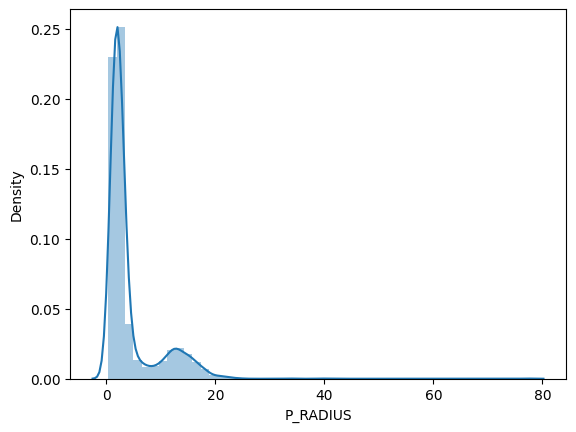

/tmp/ipython-input-3541476722.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


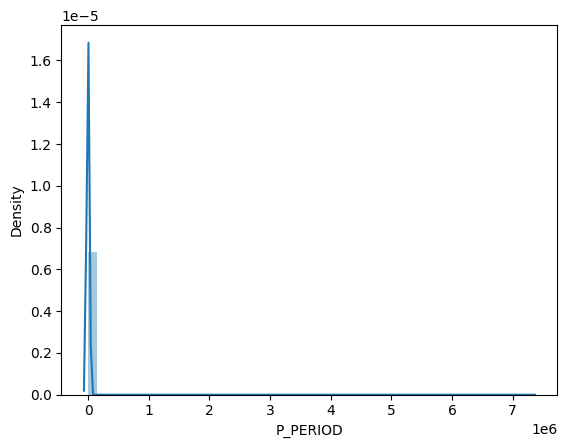

/tmp/ipython-input-3541476722.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


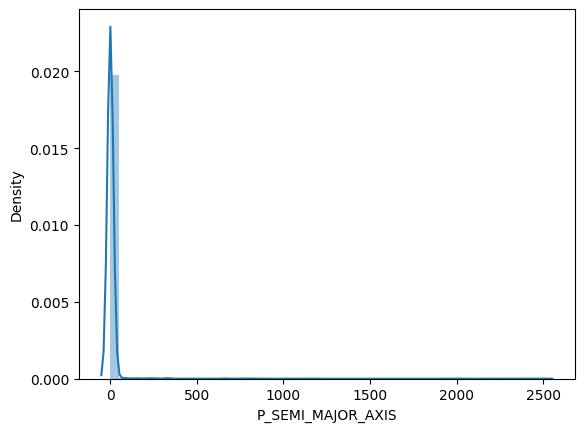

/tmp/ipython-input-3541476722.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


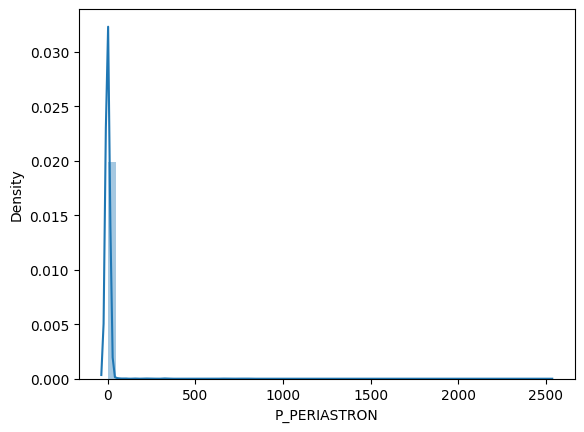

/tmp/ipython-input-3541476722.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


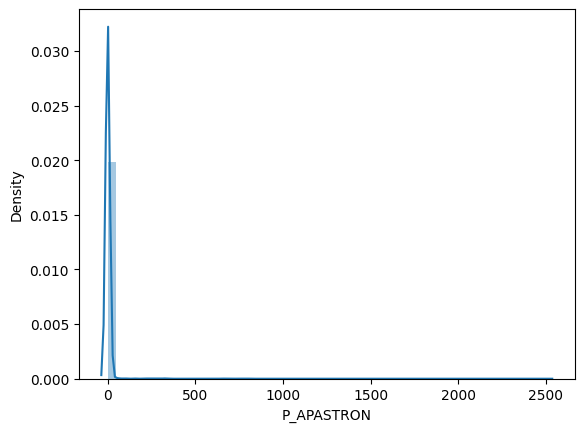

/tmp/ipython-input-3541476722.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


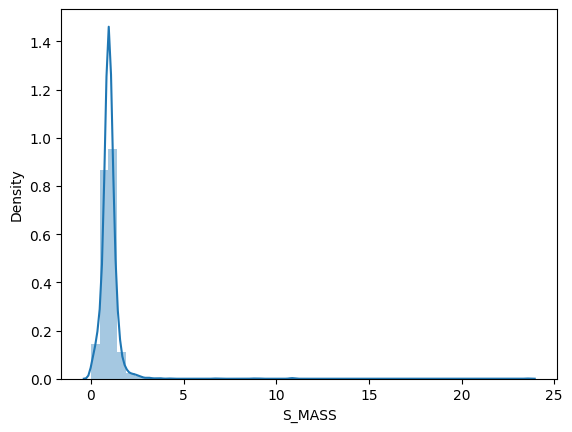

/tmp/ipython-input-3541476722.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


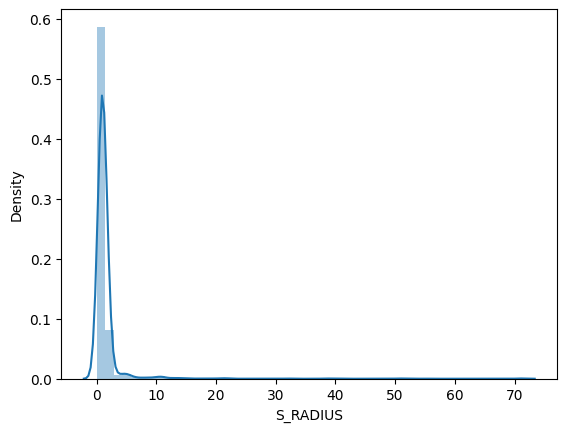

/tmp/ipython-input-3541476722.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


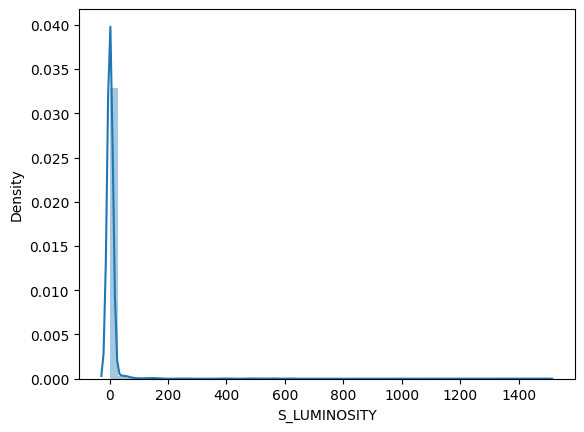

/tmp/ipython-input-3541476722.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


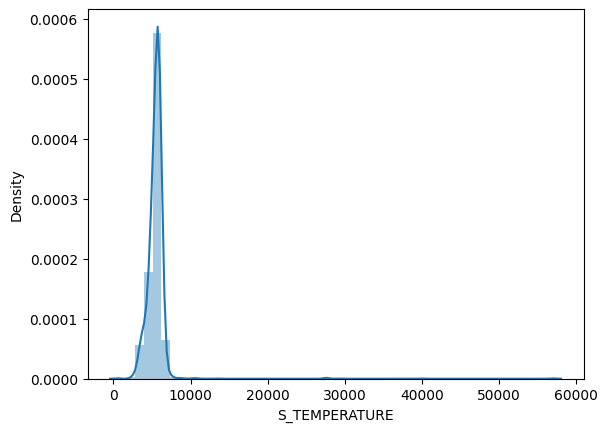

/tmp/ipython-input-3541476722.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


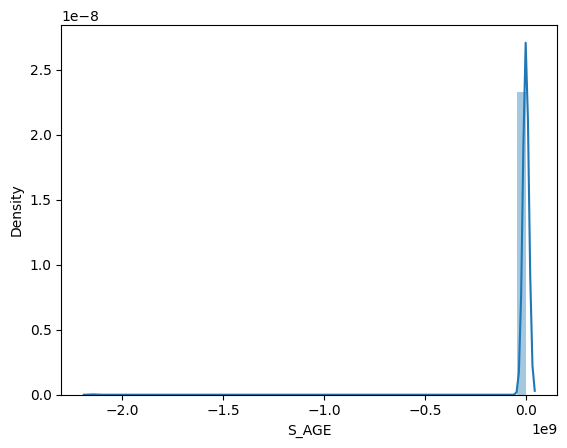

/tmp/ipython-input-3541476722.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


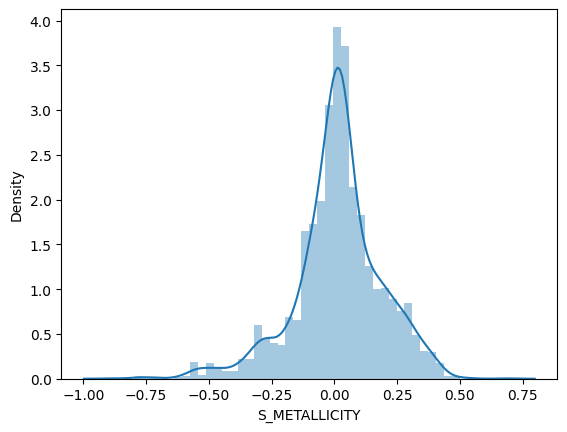

/tmp/ipython-input-3541476722.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


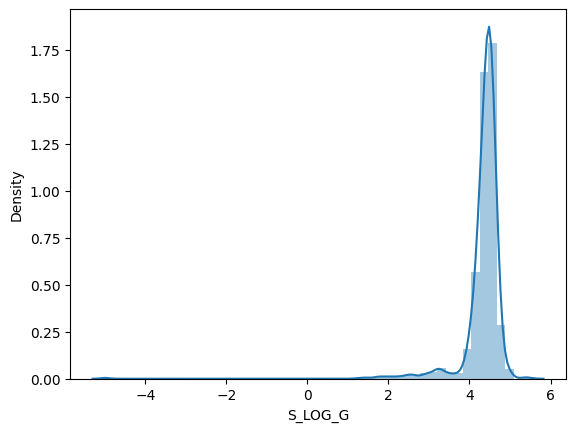

/tmp/ipython-input-3541476722.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


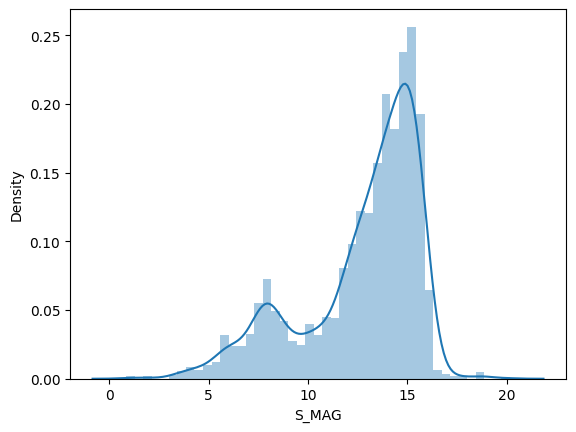

/tmp/ipython-input-3541476722.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


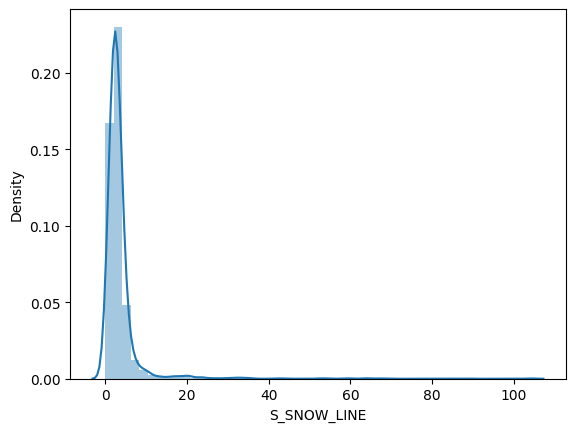

/tmp/ipython-input-3541476722.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


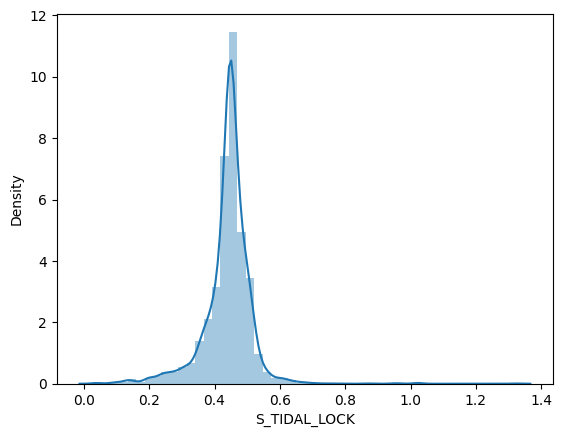

/tmp/ipython-input-3541476722.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


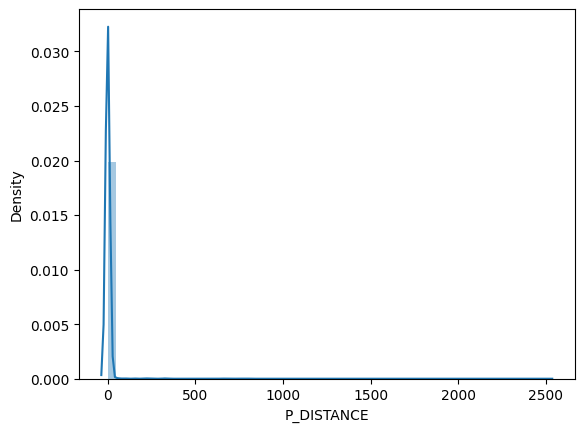

In [127]:
#distribution curve of each and every column

for col in num_cols:
    sns.distplot(df[col])
    plt.show()

HERE EVERY PLOT IS HIGHLY SKEWWD SO WE WILL USE MEDIAN IMPUTATION

In [128]:
num_cols

Index(['P_RADIUS', 'P_PERIOD', 'P_SEMI_MAJOR_AXIS', 'P_PERIASTRON',
       'P_APASTRON', 'S_MASS', 'S_RADIUS', 'S_LUMINOSITY', 'S_TEMPERATURE',
       'S_AGE', 'S_METALLICITY', 'S_LOG_G', 'S_MAG', 'S_SNOW_LINE',
       'S_TIDAL_LOCK', 'P_DISTANCE'],
      dtype='object')

In [129]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

For categorical the most frequent replacement will be used here in P_Type and S_tidal_lock

In [130]:
cat_col = ['P_TYPE', 'S_TIDAL_LOCK']

In [131]:
for col in cat_col:
    df[col] = df[col].fillna(df[col].mode()[0])

In [132]:
df.isnull().sum()

,0
P_RADIUS,0
P_TYPE,0
P_PERIOD,0
P_SEMI_MAJOR_AXIS,0
P_PERIASTRON,0
P_APASTRON,0
S_MASS,0
S_RADIUS,0
S_LUMINOSITY,0
S_TEMPERATURE,0
